# Exemplo 1 

In [264]:
# Método de Runge-Kutta de ordem 4 #
import time
import numpy as np
from prettytable import PrettyTable
# Para importar as bibliotecas necessárias.
tabela = PrettyTable()
# Criando uma tabela.
tabela.title = "Método de Runge-Kutta de ordem 4 - Feito por Allana & Jean"
tabela.field_names = ["i","x0","y0","yn","Tempo de iteração"]
# Montando o cabeçalho da tabela.
xk4 = []
yk4 = []
# xne e yne será usado para o armazenamento e plotagem dos dados.
def fx(x,y):
    return (np.log(x)-2*x*y)/(x**2)
# Declarando a função.
def rungekutta4(x0,y0,xn,h):
  n = round((xn - x0) / h)
  # Definindo o número de iterações.
  for i in range(n+1):
    start = time.time()
    # Iniciando o contador.
    k1 = fx(x0, y0)
    k2 = fx(x0+(h/2), y0+(h/2)*k1)
    k3 = fx(x0+(h/2), y0+(h/2)*k2)
    k4 = fx(x0+h, y0+h*k3)
    yn = y0 + (h/6)*(k1+2*k2+2*k3+k4)
    # Aplicando o método de Runge-Kutta 4ª ordem segundo Pedrosa.
    stop = time.time()
    # Finalizando o contador.
    tabela.add_row([i+1, x0, y0, yn, stop-start])
    # Adicionando os valores encontrados na tabela.
    xk4.append(x0)
    yk4.append(y0)
    # Adicionando valores para montar o gráfico.
    y0 = yn
    # Substituindo y atual para o y calculado.
    x0 += h
    # Adicionando o passo. 
x0 = 1.000
y0 = 2.000
# x e y iniciales.
xn = 25.000
# Calcular até o ponto xn.
h = 0.200
# h é o passo.
rungekutta4(x0,y0,xn,h)
# Chamada do método de Runge-Kutta de quarta ordem.
print(tabela)
# Apresentar tabela com os valores encontrados.

+-----------------------------------------------------------------------------------------------+
|                   Método de Runge-Kutta de ordem 4 - Feito por Allana & Jean                  |
+-----+--------------------+---------------------+---------------------+------------------------+
|  i  |         x0         |          y0         |          yn         |   Tempo de iteração    |
+-----+--------------------+---------------------+---------------------+------------------------+
|  1  |        1.0         |         2.0         |  1.4020327696748858 | 3.7670135498046875e-05 |
|  2  |        1.2         |  1.4020327696748858 |  1.0567645217379331 |  1.1444091796875e-05   |
|  3  |        1.4         |  1.0567645217379331 |  0.8407142846125941 | 1.0728836059570312e-05 |
|  4  | 1.5999999999999999 |  0.8407142846125941 |  0.6969912131940507 | 1.2874603271484375e-05 |
|  5  | 1.7999999999999998 |  0.6969912131940507 |  0.5966342077103826 | 1.4066696166992188e-05 |
|  6  | 1.9999999999

In [265]:
# Método de Adams-Bashforth de ordem 2 #
import time
import numpy as np
from prettytable import PrettyTable
# Para importar as bibliotecas necessárias.
tabela = PrettyTable()
# Criando uma tabela.
tabela.title = "Método de Adams-Bashforth de ordem 2 - Feito por Allana & Jean"
tabela.field_names = ["i","xi","yi","yi+1","yi RK4","Erro(%)","Tempo de iteração"]
# Montando o cabeçalho da tabela.
xab2 = []
yab2 = []
# xab2 e yab2 será usado para o armazenamento e plotagem dos dados.
def f(x,y):
    return (np.log(x)-2*x*y)/(x**2)
# Declarando a função.
def adams_bashforth_2(xi,yi,h,n):
  i=2
  # Iniciar a iteração
  while i<n:
    inicio = time.time()
    # Iniciando o contador temporal.
    if i==2:
      yn = yk4[i-1] + (h/2)*(3*f(xk4[i-1],yk4[i-1])-f(xk4[i-2],yk4[i-2]))
      yi = yk4[i]
      xi = xk4[i]
    else:
      yn = yi + (h/2)*(3*f(xi,yi)-f(xi-h,yab2[len(yab2) - 1]))
    # Aplicando o método de Adams-Bashforth de 2ª ordem.
    erro = (abs(yn - yk4[i])/yk4[i])*100
    # Erro relativo
    fim = time.time()
    # Finalizando o contador temporal.
    tabela.add_row([i,xi,yi,yn,yk4[i],erro,inicio - fim])
    # Adicionando os valores encontrados na tabela.
    xab2.append(xi)
    yab2.append(yi)
    # Adicionando valores para montar o gráfico.
    yi = yn
    xi += h
    # Adicionando o passo em x.
    i += 1
    # Para avançar para a próxima iteração. 
xi = 1.000
yi = 2.000
# x e y iniciales.
h = 0.200
# h é o passo.
n = 25.000
# Definindo o número de iterações.
adams_bashforth_2(xi,yi,h,n)
# Chamada do método de Adams-Bashforth de segunda ordem.
print(tabela)
# Apresentar tabela com os valores encontrados.

+------------------------------------------------------------------------------------------------------------------------------------------+
|                                      Método de Adams-Bashforth de ordem 2 - Feito por Allana & Jean                                      |
+----+--------------------+---------------------+---------------------+---------------------+--------------------+-------------------------+
| i  |         xi         |          yi         |         yi+1        |        yi RK4       |      Erro(%)       |    Tempo de iteração    |
+----+--------------------+---------------------+---------------------+---------------------+--------------------+-------------------------+
| 2  |        1.4         |  1.0567645217379331 |   1.13900004250285  |  1.0567645217379331 | 7.781820743723868  |  -4.839897155761719e-05 |
| 3  | 1.5999999999999999 |   1.13900004250285  |  0.9007529862667709 |  0.8407142846125941 | 7.1413918798635585 |  -9.298324584960938e-06 |
| 4  | 1.7999

In [266]:
# Método de Adams-Bashforth de ordem 4 #
import time
import numpy as np
from prettytable import PrettyTable
# Para importar as bibliotecas necessárias.
tabela = PrettyTable()
# Criando uma tabela.
tabela.title = "Método de Adams-Bashforth de ordem 4 - Feito por Allana & Jean"
tabela.field_names = ["i","xi","yi","yi+1","yi RK4","Erro(%)","Tempo de iteração"]
# Montando o cabeçalho da tabela.
xab4 = []
yab4 = []
# xab4 e yab4 será usado para o armazenamento e plotagem dos dados.
def f(x,y):
    return (np.log(x)-2*x*y)/(x**2)
# Declarando a função.
def adams_bashforth_4(xi,yi,h,n):
  i=4
  # Iniciar a iteração
  while i<n:
    inicio = time.time()
    # Iniciando o contador temporal.
    if i>=4 and i<7:
      yn = yk4[i-1] + (h/24)*(55*f(xk4[i-1],yk4[i-1]) - 59*f(xk4[i-2],yk4[i-2]) + 37*f(xk4[i-3],yk4[i-3]) - 9*f(xk4[i-4],yk4[i-4]))
      # Aplicando o método de Adams-Bashforth de 4ª ordem.
      yi = yk4[i]
      xi = xk4[i]
    elif i>=7:
      yn = yi + (h/24)*(55*f(xi,yi) - 59*f(xi-h,yab4[len(yab4) - 1]) + 37*f(xi-2*h,yab4[len(yab4) - 2]) - 9*f(xi-3*h,yab4[len(yab4)-3]))
      # Aplicando o método de Adams-Bashforth de 4ª ordem.
    erro = (abs(yn - yk4[i])/yk4[i])*100
    # Erro relativo
    fim = time.time()
    # Finalizando o contador temporal.
    tabela.add_row([i,xi,yi,yn,yk4[i],erro,inicio - fim])
    # Adicionando os valores encontrados na tabela.
    xab4.append(xi)
    yab4.append(yi)
    # Adicionando valores para montar o gráfico.
    yi = yn
    xi += h
    # Adicionando o passo em x.
    i += 1
    # Para avançar para a próxima iteração. 
xi = 1.000
yi = 2.000
# x e y iniciales.
h = 0.200
# h é o passo.
n = 25.000
# Definindo o número de iterações.
adams_bashforth_4(xi,yi,h,n)
# Chamada do método de Adams-Bashforth de segunda ordem.
print(tabela)
# Apresentar tabela com os valores encontrados.

+------------------------------------------------------------------------------------------------------------------------------------------+
|                                      Método de Adams-Bashforth de ordem 4 - Feito por Allana & Jean                                      |
+----+--------------------+---------------------+---------------------+---------------------+--------------------+-------------------------+
| i  |         xi         |          yi         |         yi+1        |        yi RK4       |      Erro(%)       |    Tempo de iteração    |
+----+--------------------+---------------------+---------------------+---------------------+--------------------+-------------------------+
| 4  | 1.7999999999999998 |  0.6969912131940507 |  0.7195996375283713 |  0.6969912131940507 |  3.24371726735473  |  -4.982948303222656e-05 |
| 5  | 1.9999999999999998 |  0.5966342077103826 |  0.6048221841428317 |  0.5966342077103826 | 1.3723612100404023 | -1.6450881958007812e-05 |
| 6  | 2.1999

In [267]:
# Método de Adams-Moulton de ordem 2 #
import time
import numpy as np
from prettytable import PrettyTable
# Para importar as bibliotecas necessárias.
tabela = PrettyTable()
# Criando uma tabela.
tabela.title = "Método de Adams-Moulton de ordem 2 - Feito por Allana & Jean"
tabela.field_names = ["i","xi","yi","yi+1","yi RK4","Erro(%)","Tempo de iteração"]
# Montando o cabeçalho da tabela.
xam2 = []
yam2 = []
# xam2 e yam2 será usado para o armazenamento e plotagem dos dados.
def f(x,y):
    return (np.log(x)-2*x*y)/(x**2)
# Declarando a função.
def adams_moulton_2(xi,yi,h,n):
  i=1
  # Iniciar a iteração
  while i<n:
    inicio = time.time()
    # Iniciando o contador temporal.
    yn = yi + h*(f(xi+h,yk4[i])+ f(xi,yi))/2
    # Aplicando o método de Adams-Moulton de 2ª ordem.
    erro = (abs(yn - yk4[i])/yk4[i])*100
    # Erro relativo
    fim = time.time()
    # Finalizando o contador temporal.
    tabela.add_row([i,xi,yi,yn,yk4[i],erro,inicio - fim])
    # Adicionando os valores encontrados na tabela.
    xam2.append(xi)
    yam2.append(yi)
    # Adicionando valores para montar o gráfico.
    yi = yn
    xi += h
    # Adicionando o passo em x.
    i += 1
    # Para avançar para a próxima iteração. 
xi = 1.000
yi = 2.000
# x e y iniciales.
h = 0.200
# h é o passo.
n = 25.000
# Definindo o número de iterações.
adams_moulton_2(xi,yi,h,n)
# Chamada do método de Adams-Moulton de segunda ordem.
print(tabela)
# Apresentar tabela com os valores encontrados.

+------------------------------------------------------------------------------------------------------------------------------------------+
|                                       Método de Adams-Moulton de ordem 2 - Feito por Allana & Jean                                       |
+----+--------------------+---------------------+---------------------+---------------------+--------------------+-------------------------+
| i  |         xi         |          yi         |         yi+1        |        yi RK4       |      Erro(%)       |    Tempo de iteração    |
+----+--------------------+---------------------+---------------------+---------------------+--------------------+-------------------------+
| 1  |        1.0         |         2.0         |  1.3789890909426548 |  1.4020327696748858 | 1.6435905943606837 |  -5.507469177246094e-05 |
| 2  |        1.2         |  1.3789890909426548 |  1.028019385607093  |  1.0567645217379331 | 2.7201079842807854 | -7.3909759521484375e-06 |
| 3  |       

In [268]:
# Método de Adams-Moulton de ordem 4 #
import time
import numpy as np
from prettytable import PrettyTable
# Para importar as bibliotecas necessárias.
tabela = PrettyTable()
# Criando uma tabela.
tabela.title = "Método de Adams-Moulton de ordem 4 - Feito por Allana & Jean"
tabela.field_names = ["i","xi","yi","yi+1","yi RK2","Erro(%)","Tempo de iteração"]
# Montando o cabeçalho da tabela.
xam4 = []
yam4 = []
# xam4 e yam4 será usado para o armazenamento e plotagem dos dados.
def f(x,y):
    return (np.log(x)-2*x*y)/(x**2)
# Declarando a função.
def adams_moulton_4(xi,yi,h,n):
  i=1
  # Iniciar a iteração
  while i<n:
    inicio = time.time()
    # Iniciando o contador temporal.
    if i==1 or i==2:
      yn =  yi + (h*(9*f(xi+h,yk4[i]) + 19*f(xi,yi) - 5*f(xi-h,yk4[i-2]) + f(xi-2*h,yk4[i-3])))/24
    if i>2:
      yn =  yi + (h/24)*(9*f(xi+h,yk4[i]) + 19*f(xi,yi) - 5*f(xi-h,yam4[len(yam4)-1]) + f(xi-2*h,yam4[len(yam4)-2]))
    # Aplicando o método de Adams-Moulton de 4ª ordem.
    erro = (abs(yn - yk4[i])/yk4[i])*100
    # Erro relativo
    fim = time.time()
    # Finalizando o contador temporal.
    tabela.add_row([i,xi,yi,yn,yk4[i],erro,inicio - fim])
    # Adicionando os valores encontrados na tabela.
    xam4.append(xi)
    yam4.append(yi)
    # Adicionando valores para montar o gráfico.
    yi = yn
    xi += h
    # Adicionando o passo em x.
    i += 1
    # Para avançar para a próxima iteração. 
xi = 1.000
yi = 2.000
# x e y iniciales.
h = 0.200
# h é o passo.
n = 25.000
# Definindo o número de iterações.
adams_moulton_4(xi,yi,h,n)
# Chamada do método de Adams-Moulton de segunda ordem.
print(tabela)
# Apresentar tabela com os valores encontrados.

+------------------------------------------------------------------------------------------------------------------------------------------+
|                                       Método de Adams-Moulton de ordem 4 - Feito por Allana & Jean                                       |
+----+--------------------+---------------------+---------------------+---------------------+--------------------+-------------------------+
| i  |         xi         |          yi         |         yi+1        |        yi RK2       |      Erro(%)       |    Tempo de iteração    |
+----+--------------------+---------------------+---------------------+---------------------+--------------------+-------------------------+
| 1  |        1.0         |         2.0         |  1.210744943522236  |  1.4020327696748858 | 13.643605933476657 |  -4.267692565917969e-05 |
| 2  |        1.2         |  1.210744943522236  |  0.9727522590462515 |  1.0567645217379331 | 7.9499510972905085 | -1.2874603271484375e-05 |
| 3  |       

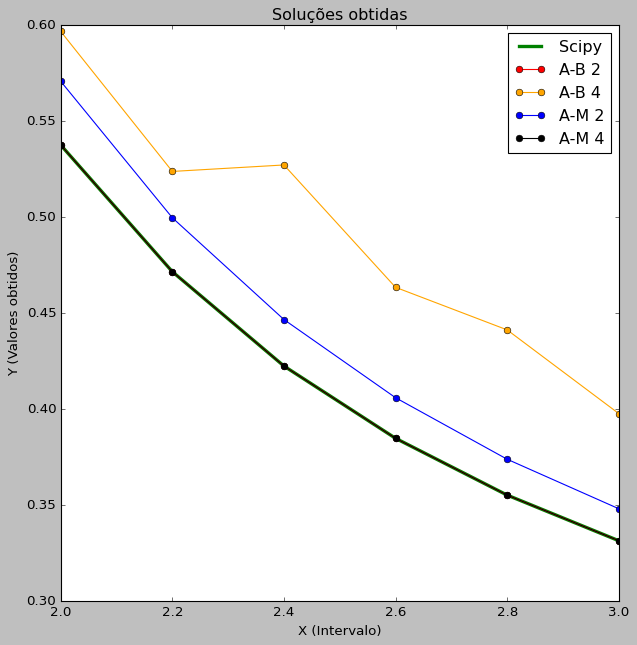

In [269]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
# importando bibliotecas necessárias.
def f(y,x):
    dydx = (np.log(x)-2*x*y)/(x**2)
    return dydx
# A equação diferencial utilizada(dy/dx).
y0 = 2.000
# Condição inicial.
x = np.linspace(1.000,5)
# Intervalo para x.
y = odeint(f,y0,x)
# Para resolver utilizando bibliotecas profissionais da linguagem.
plt.figure(figsize=(9, 9))
plt.plot( x, y,'b-', linewidth=3, color='green', label = 'Scipy')
plt.plot( xam4, yam4,'o-', color='red', label = 'A-B 2')
plt.plot( xab4, yab4,'o-', color='orange', label = 'A-B 4')
plt.plot( xam2, yam2,'o-', color='blue', label = 'A-M 2')
plt.plot( xam4, yam4,'o-', color='black', label = 'A-M 4')
plt.style.use('classic')
plt.title('Soluções obtidas')
plt.xlabel('X (Intervalo)')
plt.ylabel('Y (Valores obtidos)')
plt.ylim(0.3,0.6)
plt.xlim(2,3)
plt.legend(loc='upper right')
#plt.grid('False')
plt.show()
# Configurações usadas para criar o gráfico.

# Exemplo 2

In [270]:
# Método de Runge-Kutta de ordem 4 #
import time
import numpy as np
from prettytable import PrettyTable
# Para importar as bibliotecas necessárias.
tabela = PrettyTable()
# Criando uma tabela.
tabela.title = "Método de Runge-Kutta de ordem 4 - Feito por Allana & Jean"
tabela.field_names = ["i","x0","y0","yn","Tempo de iteração"]
# Montando o cabeçalho da tabela.
xk4 = []
yk4 = []
# xne e yne será usado para o armazenamento e plotagem dos dados.
def fx(x,y):
    return np.sqrt(1+y)
# Declarando a função.
def rungekutta4(x0,y0,xn,h):
  n = round((xn - x0) / h)
  # Definindo o número de iterações.
  for i in range(n+1):
    start = time.time()
    # Iniciando o contador.
    k1 = fx(x0, y0)
    k2 = fx(x0+(h/2), y0+(h/2)*k1)
    k3 = fx(x0+(h/2), y0+(h/2)*k2)
    k4 = fx(x0+h, y0+h*k3)
    yn = y0 + (h/6)*(k1+2*k2+2*k3+k4)
    # Aplicando o método de Runge-Kutta 4ª ordem segundo Pedrosa.
    stop = time.time()
    # Finalizando o contador.
    tabela.add_row([i+1, x0, y0, yn, stop-start])
    # Adicionando os valores encontrados na tabela.
    xk4.append(x0)
    yk4.append(y0)
    # Adicionando valores para montar o gráfico.
    y0 = yn
    # Substituindo y atual para o y calculado.
    x0 += h
    # Adicionando o passo. 
x0 = 2.000
y0 = 4.000
# x e y iniciales.
xn = 25.000
# Calcular até o ponto xn.
h = 0.200
# h é o passo.
rungekutta4(x0,y0,xn,h)
# Chamada do método de Runge-Kutta de quarta ordem.
print(tabela)
# Apresentar tabela com os valores encontrados.

+---------------------------------------------------------------------------------------------+
|                  Método de Runge-Kutta de ordem 4 - Feito por Allana & Jean                 |
+-----+--------------------+--------------------+--------------------+------------------------+
|  i  |         x0         |         y0         |         yn         |   Tempo de iteração    |
+-----+--------------------+--------------------+--------------------+------------------------+
|  1  |        2.0         |        4.0         | 4.457213552650117  | 4.029273986816406e-05  |
|  2  |        2.2         | 4.457213552650117  | 4.934427108604007  | 1.2159347534179688e-05 |
|  3  | 2.4000000000000004 | 4.934427108604007  | 5.431640667358167  | 1.1682510375976562e-05 |
|  4  | 2.6000000000000005 | 5.431640667358167  | 5.948854228501464  | 1.1682510375976562e-05 |
|  5  | 2.8000000000000007 | 5.948854228501464  | 6.486067791695524  | 1.0967254638671875e-05 |
|  6  | 3.000000000000001  | 6.486067791

In [271]:
# Método de Adams-Bashforth de ordem 2 #
import time
import numpy as np
from prettytable import PrettyTable
# Para importar as bibliotecas necessárias.
tabela = PrettyTable()
# Criando uma tabela.
tabela.title = "Método de Adams-Bashforth de ordem 2 - Feito por Allana & Jean"
tabela.field_names = ["i","xi","yi","yi+1","yi RK4","Erro(%)","Tempo de iteração"]
# Montando o cabeçalho da tabela.
xab2 = []
yab2 = []
# xab2 e yab2 será usado para o armazenamento e plotagem dos dados.
def f(x,y):
    return np.sqrt(1+y)
# Declarando a função.
def adams_bashforth_2(xi,yi,h,n):
  i=2
  # Iniciar a iteração
  while i<n:
    inicio = time.time()
    # Iniciando o contador temporal.
    if i==2:
      yn = yk2[i-1] + (h/2)*(3*f(xk4[i-1],yk4[i-1])-f(xk4[i-2],yk4[i-2]))
      yi = yk4[i]
      xi = xk4[i]
    else:
      yn = yi + (h/2)*(3*f(xi,yi)-f(xi-h,yab2[len(yab2) - 1]))
    # Aplicando o método de Adams-Bashforth de 2ª ordem.
    erro = (abs(yn - yk4[i])/yk4[i])*100
    # Erro relativo
    fim = time.time()
    # Finalizando o contador temporal.
    tabela.add_row([i,xi,yi,yn,yk4[i],erro,inicio - fim])
    # Adicionando os valores encontrados na tabela.
    xab2.append(xi)
    yab2.append(yi)
    # Adicionando valores para montar o gráfico.
    yi = yn
    xi += h
    # Adicionando o passo em x.
    i += 1
    # Para avançar para a próxima iteração. 
x0 = 2.000
y0 = 4.000
# x e y iniciales.
h = 0.200
# h é o passo.
n = 25.000
# Definindo o número de iterações.
adams_bashforth_2(xi,yi,h,n)
# Chamada do método de Adams-Bashforth de segunda ordem.
print(tabela)
# Apresentar tabela com os valores encontrados.

+---------------------------------------------------------------------------------------------------------------------------------------+
|                                     Método de Adams-Bashforth de ordem 2 - Feito por Allana & Jean                                    |
+----+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------------+
| i  |         xi         |         yi         |        yi+1        |       yi RK4       |      Erro(%)       |    Tempo de iteração    |
+----+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------------+
| 2  | 2.4000000000000004 | 4.934427108604007  | 6.260849956384913  | 4.934427108604007  | 26.880989800580167 |  -3.886222839355469e-05 |
| 3  | 2.6000000000000005 | 6.260849956384913  | 6.825622091319877  | 5.431640667358167  | 25.66409505582616  |  -8.821487426757812e-06 |
| 4  | 2.8000000000000007 | 6.8256

In [272]:
# Método de Adams-Bashforth de ordem 4 #
import time
import numpy as np
from prettytable import PrettyTable
# Para importar as bibliotecas necessárias.
tabela = PrettyTable()
# Criando uma tabela.
tabela.title = "Método de Adams-Bashforth de ordem 4 - Feito por Allana & Jean"
tabela.field_names = ["i","xi","yi","yi+1","yi RK4","Erro(%)","Tempo de iteração"]
# Montando o cabeçalho da tabela.
xab4 = []
yab4 = []
# xab4 e yab4 será usado para o armazenamento e plotagem dos dados.
def f(x,y):
    return np.sqrt(1+y)
# Declarando a função.
def adams_bashforth_4(xi,yi,h,n):
  i=4
  # Iniciar a iteração
  while i<n:
    inicio = time.time()
    # Iniciando o contador temporal.
    if i==4:
      yn = yk4[i-1] + (h/24)*(55*f(xk4[i-1],yk4[i-1]) - 59*f(xk4[i-2],yk4[i-2]) + 37*f(xk4[i-3],yk4[i-3]) - 9*f(xk4[i-4],yk4[i-4]))
      # Aplicando o método de Adams-Bashforth de 4ª ordem.
      yi = yk4[i]
      xi = xk4[i]
    if i==5:
      yn = yi + (h/24)*(55*f(xi,yi) - 59*f(xi-h, yab4[len(yab4) - 1]) + 37*f(xk4[i-3],yk4[i-3]) - 9*f(xk4[i-4],yk4[i-4]))
      # Aplicando o método de Adams-Bashforth de 4ª ordem.
    if i==6:
      yn = yi + (h/24)*(55*f(xi,yi) - 59*f(xi-h, yab4[len(yab4) - 1]) + 37*f(xi-2*h, yab4[len(yab4) - 2]) - 9*f(xk4[i-4],yk4[i-4]))
      # Aplicando o método de Adams-Bashforth de 4ª ordem.
    if i>=7:
      yn = yi + (h/24)*(55*f(xi,yi) - 59*f(xi-h,yab4[len(yab4) - 1]) + 37*f(xi-2*h,yab4[len(yab4) - 2]) - 9*f(xi-3*h,yab4[len(yab4)-3]))
      # Aplicando o método de Adams-Bashforth de 4ª ordem.
    erro = (abs(yn - yk4[i])/yk4[i])*100
    # Erro relativo
    fim = time.time()
    # Finalizando o contador temporal.
    tabela.add_row([i,xi,yi,yn,yk4[i],erro,inicio - fim])
    # Adicionando os valores encontrados na tabela.
    xab4.append(xi)
    yab4.append(yi)
    # Adicionando valores para montar o gráfico.
    yi = yn
    xi += h
    # Adicionando o passo em x.
    i += 1
    # Para avançar para a próxima iteração. 
x0 = 2.000
y0 = 4.000
# x e y iniciales.
h = 0.200
# h é o passo.
n = 25.000
# Definindo o número de iterações.
adams_bashforth_4(xi,yi,h,n)
# Chamada do método de Adams-Bashforth de segunda ordem.
print(tabela)
# Apresentar tabela com os valores encontrados.

+------------------------------------------------------------------------------------------------------------------------------------------+
|                                      Método de Adams-Bashforth de ordem 4 - Feito por Allana & Jean                                      |
+----+--------------------+--------------------+--------------------+--------------------+-----------------------+-------------------------+
| i  |         xi         |         yi         |        yi+1        |       yi RK4       |        Erro(%)        |    Tempo de iteração    |
+----+--------------------+--------------------+--------------------+--------------------+-----------------------+-------------------------+
| 4  | 2.8000000000000007 | 5.948854228501464  | 5.948854257579189  | 5.948854228501464  | 4.887953881489991e-07 |  -4.315376281738281e-05 |
| 5  | 3.000000000000001  | 5.948854257579189  | 6.4369011853842775 | 6.486067791695524  |   0.7580341108089697  |  -1.430511474609375e-05 |
| 6  | 3.2000

In [273]:
# Método de Adams-Moulton de ordem 2 #
import time
import numpy as np
from prettytable import PrettyTable
# Para importar as bibliotecas necessárias.
tabela = PrettyTable()
# Criando uma tabela.
tabela.title = "Método de Adams-Moulton de ordem 2 - Feito por Allana & Jean"
tabela.field_names = ["i","xi","yi","yi+1","yi RK4","Erro(%)","Tempo de iteração"]
# Montando o cabeçalho da tabela.
xam2 = []
yam2 = []
# xam2 e yam2 será usado para o armazenamento e plotagem dos dados.
def f(x,y):
    return np.sqrt(1+y)
# Declarando a função.
def adams_moulton_2(xi,yi,h,n):
  i=1
  # Iniciar a iteração
  while i<n:
    inicio = time.time()
    # Iniciando o contador temporal.
    yn = yi + h*(f(xi+h,yk4[i])+ f(xi,yi))/2
    # Aplicando o método de Adams-Moulton de 2ª ordem.
    erro = (abs(yn - yk4[i])/yk4[i])*100
    # Erro relativo
    fim = time.time()
    # Finalizando o contador temporal.
    tabela.add_row([i,xi,yi,yn,yk4[i],erro,inicio - fim])
    # Adicionando os valores encontrados na tabela.
    xam2.append(xi)
    yam2.append(yi)
    # Adicionando valores para montar o gráfico.
    yi = yn
    xi += h
    # Adicionando o passo em x.
    i += 1
    # Para avançar para a próxima iteração. 
x0 = 2.000
y0 = 4.000
# x e y iniciales.
h = 0.200
# h é o passo.
n = 25.000
# Definindo o número de iterações.
adams_moulton_2(xi,yi,h,n)
# Chamada do método de Adams-Moulton de segunda ordem.
print(tabela)
# Apresentar tabela com os valores encontrados.

+---------------------------------------------------------------------------------------------------------------------------------------+
|                                      Método de Adams-Moulton de ordem 2 - Feito por Allana & Jean                                     |
+----+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------------+
| i  |         xi         |         yi         |        yi+1        |       yi RK4       |      Erro(%)       |    Tempo de iteração    |
+----+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------------+
| 1  |        1.0         |        2.0         | 2.406811877589731  | 4.457213552650117  | 46.001872040465344 | -3.3855438232421875e-05 |
| 2  |        1.2         | 2.406811877589731  | 2.834994183334681  | 4.934427108604007  | 42.54663974281048  |    -7.62939453125e-06   |
| 3  |        1.4         | 2.8349

In [274]:
# Método de Adams-Moulton de ordem 4 #
import time
import numpy as np
from prettytable import PrettyTable
# Para importar as bibliotecas necessárias.
tabela = PrettyTable()
# Criando uma tabela.
tabela.title = "Método de Adams-Moulton de ordem 4 - Feito por Allana & Jean"
tabela.field_names = ["i","xi","yi","yi+1","yi RK4","Erro(%)","Tempo de iteração"]
# Montando o cabeçalho da tabela.
xam4 = []
yam4 = []
# xam4 e yam4 será usado para o armazenamento e plotagem dos dados.
def fx(x,y):
    return np.sqrt(1+y)
# Declarando a função.
def adams_moulton_4(xi,yi,h,n):
  i=1
  # Iniciar a iteração
  while i<n:
    inicio = time.time()
    # Iniciando o contador temporal.
    if i==1 or i==2:
      yn =  yi + (h*(9*f(xi+h,yk4[i]) + 19*f(xi,yi) - 5*f(xi-h,yk4[i-2]) + f(xi-2*h,yk4[i-3])))/24
    if i>2:
      yn =  yi + (h/24)*(9*f(xi+h,yk4[i]) + 19*f(xi,yi) - 5*f(xi-h,yam4[len(yam4)-1]) + f(xi-2*h,yam4[len(yam4)-2]))
    # Aplicando o método de Adams-Moulton de 4ª ordem.
    erro = (abs(yn - yk4[i])/yk4[i])*100
    # Erro relativo
    fim = time.time()
    # Finalizando o contador temporal.
    tabela.add_row([i,xi,yi,yn,yk4[i],erro,inicio - fim])
    # Adicionando os valores encontrados na tabela.
    xam4.append(xi)
    yam4.append(yi)
    # Adicionando valores para montar o gráfico.
    yi = yn
    xi += h
    # Adicionando o passo em x.
    i += 1
    # Para avançar para a próxima iteração. 
x0 = 2.000
y0 = 4.000
# x e y iniciales.
h = 0.200
# h é o passo.
n = 25.000
# Definindo o número de iterações.
adams_moulton_4(xi,yi,h,n)
# Chamada do método de Adams-Moulton de segunda ordem.
print(tabela)
# Apresentar tabela com os valores encontrados.

+---------------------------------------------------------------------------------------------------------------------------------------+
|                                      Método de Adams-Moulton de ordem 4 - Feito por Allana & Jean                                     |
+----+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------------+
| i  |         xi         |         yi         |        yi+1        |       yi RK4       |      Erro(%)       |    Tempo de iteração    |
+----+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------------+
| 1  |        1.0         |        2.0         | 1.9907442120714938 | 4.457213552650117  | 55.336575451094085 | -3.9577484130859375e-05 |
| 2  |        1.2         | 1.9907442120714938 | 2.4685650402882846 | 4.934427108604007  | 49.97261108622064  | -1.2874603271484375e-05 |
| 3  |        1.4         | 2.4685

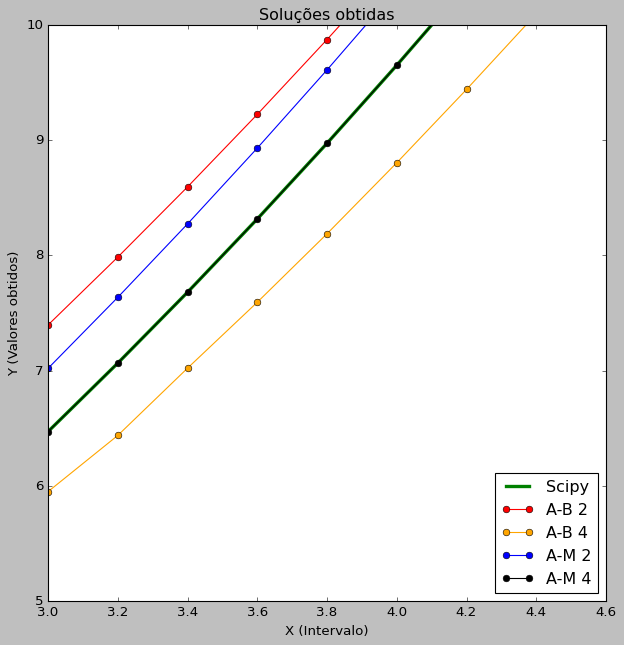

In [275]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
# importando bibliotecas necessárias.
def f(y,x):
    dydx = np.sqrt(1+y)
    return dydx
# A equação diferencial utilizada(dy/dx).
y0 = 4.000
# Condição inicial.
x = np.linspace(1,5)
# Intervalo para x.
y = odeint(f,y0,x)
# Para resolver utilizando bibliotecas profissionais da linguagem.
plt.figure(figsize=(9, 9))
plt.plot( x, y,'b-', linewidth=3, color='green', label = 'Scipy')
plt.plot( xab2, yab2,'o-', color='red', label = 'A-B 2')
plt.plot( xab4, yab4,'o-', color='orange', label = 'A-B 4')
plt.plot( xam2, yam2,'o-', color='blue', label = 'A-M 2')
plt.plot( xam4, yam4,'o-', color='black', label = 'A-M 4')
plt.style.use('classic')
plt.title('Soluções obtidas')
plt.xlabel('X (Intervalo)')
plt.ylabel('Y (Valores obtidos)')
plt.ylim(5,10)
plt.xlim(3,4.6)
plt.legend(loc='lower right')
#plt.grid('False')
plt.show()
# Configurações usadas para criar o gráfico.

# Adams-Bashforth INGNORAR

In [276]:
from prettytable import PrettyTable
tabela = PrettyTable()
tabela.field_names = ["x","y"]
xab2 = [] 
yab2 = []

def adams_bash_2(h,xmax,y0):  
  dimensao = np.size( y0)
  iteracao_max = np.int( xmax/h)
  y = np.empty((iteracao_max+1,dimensao))
  y[0,:]=y0
  
  #inicaliza com RK2
  k1 = f(0,   y[0,:])
  k2 = f(h, y[0,:] + k1*h)
  y[1,:] = y[0,:] + (k1+k2)*(h/2)
  fn = k1
  for i in np.arange(0,iteracao_max-1):
    x=(i+1)*h
    fn1 = f(x, y[i+1,:])
    y[i+2,:] = y[i+1,:] + (h/2)*( 3*fn1 - fn)
    tabela.add_row([x,y[i,:]])
    xab2.append(x)
    yab2.append(y[i,:])
    fn=fn1

def f(x,y):
  return 

y0=0  
h=0.100  
xmax=1  
adams_bash_2(h,xmax,y0)  

print(tabela)

TypeError: ignored

In [ ]:
from prettytable import PrettyTable
tabela = PrettyTable()
tabela.field_names = ["x","y"]
xab4 = []
yab4 = []
def adams_bash_4(h,xmax,y0):  
  dimensao = np.size( y0)
  iteracao_max = np.int( xmax/h)
  y = np.empty((iteracao_max+1,dimensao))
  y[0,:]=y0
  x0 = 0
  
  #inicaliza com RK4
  k1 = f(x0,   y[0,:])
  k2 = f(h/2 + x0, y[0,:] + k1*(h/2))
  k3 = f(h/2 + x0, y[0,:] + k2*(h/2))
  k4 = f(h + x0, y[0,:] + k3*h)
  y[1,:] = y[0,:] + (k1+2*k2+2*k3+k4)*(h/6)
  fn=k1
  x0 += h

  k1 = f(x0,   y[1,:])
  k2 = f(h/2 + x0, y[1,:] + k1*(h/2))
  k3 = f(h/2 + x0, y[1,:] + k2*(h/2))
  k4 = f(h + x0, y[1,:] + k3*h)
  y[2,:] = y[1,:] + (k1+2*k2+2*k3+k4)*(h/6)
  fn1=k1
  x0 += h

  k1 = f(x0,   y[2,:])
  k2 = f(h/2 + x0, y[2,:] + k1*(h/2))
  k3 = f(h/2 + x0, y[2,:] + k2*(h/2))
  k4 = f(h + x0, y[2,:] + k3*h)
  y[3,:] = y[2,:] + (k1+2*k2+2*k3+k4)*(h/6)
  fn2=k1

  i = 0
  x0 += 2*h

  while x0 <= xmax:
    
    fn3 = f(x0, y[i+3,:])
    y[i+4,:] = y[i+3,:] + (h/24)*(55*fn3 - 59*fn2 + 37*fn1 - 9*fn)
    tabela.add_row([x0,y[i+2,:]])
    xab4.append(x0)
    yab4.append(y[i,:])
    fn = fn1
    fn1 = fn2
    fn2 = fn3
    x0 += h
    i+=1

def f(x,y):
  return np.sqrt(1+y)

y0=0  
h=0.100  
xmax=1  
adams_bash_4(h,xmax,y0)  

print(tabela)

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
# importando bibliotecas necessárias.
def f(y,x):
    dydx = np.sqrt(1+y)
    return dydx
# A equação diferencial utilizada(dy/dx).
y0 = 0.000
# Condição inicial.
x = np.linspace(0,1)
# Intervalo para x.
y = odeint(f,y0,x)
# Para resolver utilizando bibliotecas profissionais da linguagem.
plt.figure(figsize=(9, 9))
plt.plot( x, y,'b-', linewidth=3, color='green', label = 'Scipy')
plt.plot( xab2, yab2,'o-', color='red', label = 'A-B 2')
plt.plot( xab4, yab4,'o-', color='orange', label = 'A-B 4')
plt.style.use('classic')
plt.title('Soluções obtidas')
plt.xlabel('X (Intervalo)')
plt.ylabel('Y (Valores obtidos)')
plt.ylim()
plt.xlim()
plt.legend(loc='upper right')
#plt.grid('False')
plt.show()
# Configurações usadas para criar o gráfico.